In [1]:
import pandas as pd 
import geopandas as gpd

## Explication du process 

on merge la densité de population avec le revenu dans un csv 
ensuite on merge ce csv avec le geojson des secteurs de la ville

### 2.Récupération des infos de densité de population par secteur, changement de nom de colonnes et choix parmis celles qui nous intéressent

In [2]:
densite = pd.read_excel("..\data\densite_par_secteur.xlsx")
new_densite = densite[["CD_SECTOR","TOTAL","OPPERVLAKKTE IN HM²","CD_REFNIS"]]
new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)
new_densite.head()

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\1290119396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\1290119396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)


,CD_SECTOR,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,11001A00-,2474,53.158956,11001
1,11001A01-,2805,67.115758,11001
2,11001A020,752,28.084816,11001
3,11001A030,441,42.812540,11001
4,11001A042,346,25.562366,11001


In [3]:
new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\3025819748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\3025819748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)


### 3. Récupération des données de revenus, changement de nom de colonnes et séléction de celle dont on a besoin 

In [4]:
revenu = pd.read_excel("../data/revenu_par_secteur.xlsx")
new_revenu = revenu[["CD_SECTOR","MS_AVG_TOT_NET_TAXABLE_INC","MS_MEDIAN_NET_TAXABLE_INC"]]
new_revenu.head()

,CD_SECTOR,MS_AVG_TOT_NET_TAXABLE_INC,MS_MEDIAN_NET_TAXABLE_INC
0,11001A00-,28979.0,21962.0
1,11001A01-,35113.0,25261.0
2,11001A020,37532.0,25591.0
3,11001A030,28876.0,22651.0
4,11001A042,63624.0,28844.0


In [5]:
new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\3909679622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_26620\3909679622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)


In [6]:
new_revenu

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN
0,11001A00-,28979.0,21962.0
1,11001A01-,35113.0,25261.0
2,11001A020,37532.0,25591.0
3,11001A030,28876.0,22651.0
4,11001A042,63624.0,28844.0
...,...,...,...
318559,93090H000,29321.0,27128.0
318560,93090H012,41765.0,32642.0
318561,93090H063,NaN,NaN
318562,93090H091,NaN,NaN


### 4. Merge de la densité et du revenu sur la col du code du secteur

In [7]:
# précision du code NIS pour chaque commune
Liege = 62063
charleroi = 52011
mons = 53053
namur = 92094
tournai = 57081

In [8]:
revenu_densite = new_revenu.merge(new_densite, on="CD_SECTOR")
revenu_densite.head()

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,11001A00-,28979.0,21962.0,2474,53.158956,11001
1,11001A00-,29689.0,22337.0,2474,53.158956,11001
2,11001A00-,31879.0,22409.0,2474,53.158956,11001
3,11001A00-,31803.0,23184.0,2474,53.158956,11001
4,11001A00-,32531.0,24239.0,2474,53.158956,11001


In [10]:
bxl = gpd.read_file("../data/final_data_Used/secteurs/bxl_secteurs_sur.geojson")
bxl.head()
list_NIS = bxl['cd_munty_refnis'].drop_duplicates().tolist()
bxlss = pd.DataFrame()

for nis in list_NIS:
    bxl_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == int(nis)]
    bxlss = pd.concat([bxlss, bxl_gpd], ignore_index=True).drop_duplicates(subset="CD_SECTOR")

bxlss.shape
bxlss



,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,21001A00-,16214.0,12469.0,2665,12.514623,21001
1,21001A011,16030.0,13049.0,3272,17.884319,21001
2,21001A02-,15429.0,11874.0,1026,3.875428,21001
3,21001A031,17009.0,13092.0,1980,10.893764,21001
4,21001A041,20136.0,16086.0,2735,15.746445,21001
...,...,...,...,...,...,...
1189,21019A492,NaN,NaN,2,61.864473,21019
1203,21019A51-,31672.0,20192.0,1799,19.119013,21019
1219,21019A52-,28779.0,19225.0,1433,12.752232,21019
1235,21019ZZZZ,44511.0,25681.0,50,0.000000,21019


In [ ]:

liege_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == 62063]
charleroi_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == charleroi]
mons_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == mons]
namur_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == namur]
tournai_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == tournai]
charleroi_gpd.shape

(4558, 6)

### 5. Récupération du fichier des secteur et changement de nom de colonne

['ogc_fid',
 'CD_SECTOR',
 'tx_sector_descr_nl',
 'tx_sector_descr_fr',
 'tx_sector_descr_de',
 'cd_sub_munty',
 'tx_sub_munty_nl',
 'tx_sub_munty_fr',
 'tx_munty_dstr',
 'cd_munty_refnis',
 'tx_munty_descr_nl',
 'tx_munty_descr_fr',
 'tx_munty_descr_de',
 'cd_dstr_refnis',
 'tx_adm_dstr_descr_nl',
 'tx_adm_dstr_descr_fr',
 'tx_adm_dstr_descr_de',
 'cd_prov_refnis',
 'tx_prov_descr_nl',
 'tx_prov_descr_fr',
 'tx_prov_descr_de',
 'cd_rgn_refnis',
 'tx_rgn_descr_nl',
 'tx_rgn_descr_fr',
 'tx_rgn_descr_de',
 'cd_country',
 'cd_nuts_lvl1',
 'cd_nuts_lvl2',
 'cd_nuts_lvl3',
 'ms_area_ha',
 'ms_perimeter_m',
 'dt_situation',
 'geometry']

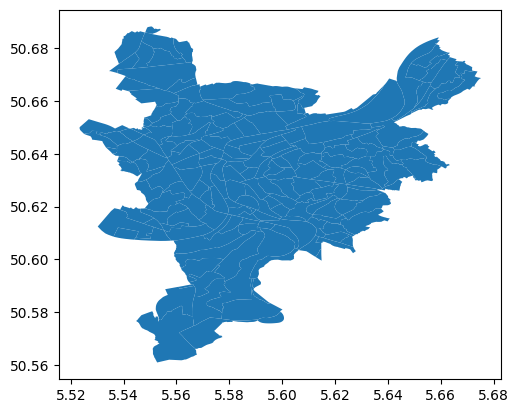

In [ ]:
liege = gpd.read_file("../data/secteurs/liege_secteur.geojson")
liege.plot(aspect=1)
liege.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
liege.head()
liege.columns.tolist()

### 6. merge du geojson avec les revenu et la densité + tentative de changement de type de projection

In [ ]:
secteur_densite_revenu = liege.merge(liege_gpd, on="CD_SECTOR",how="right").drop_duplicates(subset="CD_SECTOR")
gdf = gpd.GeoDataFrame(secteur_densite_revenu)
print(liege.shape)
print(gdf.shape)


final = secteur_densite_revenu.to_crs("EPSG:4326")
final_2 = final.to_crs("wgs84")

final_2.to_file("../data/revenu_densite_geojson/liege_revenu_densite.geojson", driver="GeoJSON")


(184, 33)
(183, 38)


<Axes: >

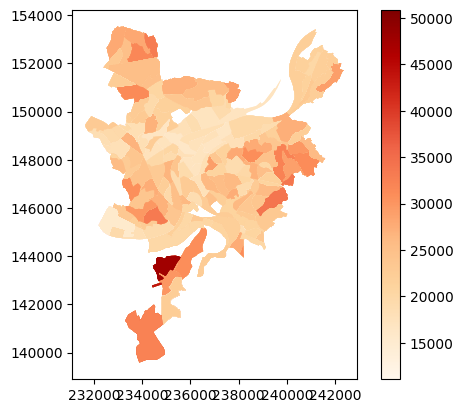

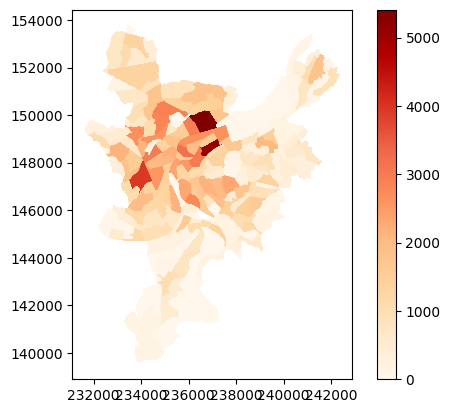

In [ ]:
secteur_densite_revenu.plot(aspect=1,column="REVENU_MEDIAN",legend=True, cmap="OrRd")
secteur_densite_revenu.plot(aspect=1,column="NOMBRE_HAB",legend=True, cmap="OrRd")


### Script pour export toutes les villes

In [ ]:
list_ville = ["charleroi", "liege", "mons", "namur", "tournai"]

for city in list_ville : 
    ville = gpd.read_file(f"../data/secteurs/{city}_secteur.geojson")
    ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
    print(ville.shape)

    secteur_densite_revenu = ville.merge(revenu_densite, on="CD_SECTOR").drop_duplicates(subset="CD_SECTOR")
    secteur_densite_revenu.head()
    print(secteur_densite_revenu.shape)

    secteur_densite_revenu.to_file(f"../data/revenu_densite_geojson/{city}_revenu_densite.geojson", driver="GeoJSON")

(291, 33)
(288, 38)
(184, 33)
(182, 38)
(160, 33)
(158, 38)
(207, 33)
(207, 38)
(172, 33)
(172, 38)


In [12]:
ville = gpd.read_file(f"../data/final_data_Used/secteurs/bxl_secteurs_sur.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)


testt = ville.merge(bxlss, on="CD_SECTOR").drop_duplicates(subset="CD_SECTOR")
print(testt.shape)
display(testt)
testt.to_file(f"../data/revenu_densite_geojson/bxl_revenu_densite.geojson", driver="GeoJSON")

(710, 38)


,ogc_fid,CD_SECTOR,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,1998,21001A00-,VERZET,RESISTANCE,RESISTANCE,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,NaN,21001,...,BE100,12.514422,1730,2023-01-01,"POLYGON ((4.31374 50.83613, 4.31286 50.83801, ...",16214.0,12469.0,2665,12.514623,21001
1,1999,21001A011,KLEINMOLEN,KLEINMOLEN,KLEINMOLEN,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,NaN,21001,...,BE100,17.884033,1952,2023-01-01,"POLYGON ((4.31794 50.83828, 4.31749 50.83904, ...",16030.0,13049.0,3272,17.884319,21001
2,2000,21001A02-,WAYEZ,WAYEZ,WAYEZ,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,NaN,21001,...,BE100,3.875365,1680,2023-01-01,"POLYGON ((4.31750 50.83669, 4.31749 50.83669, ...",15429.0,11874.0,1026,3.875428,21001
3,2001,21001A031,RAUTER-ZUID,RAUTER-SUD,RAUTER-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,NaN,21001,...,BE100,10.893589,1539,2023-01-01,"POLYGON ((4.31039 50.83153, 4.30983 50.83187, ...",17009.0,13092.0,1980,10.893764,21001
4,2002,21001A041,VEEWEIDE-ZUID,VEEWEYDE-SUD,VEEWEYDE-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,NaN,21001,...,BE100,15.746192,1693,2023-01-01,"POLYGON ((4.30243 50.83301, 4.30214 50.83305, ...",20136.0,16086.0,2735,15.746445,21001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2717,21019A441,FAZANTENPARK,FAISANDERIE,FAISANDERIE,21019A,SINT-PIETERS-WOLUWE,WOLUWE-SAINT-PIERRE,NaN,21019,...,BE100,16.280465,1971,2023-01-01,"POLYGON ((4.45819 50.82213, 4.45819 50.82310, ...",53658.0,17824.0,364,16.280727,21019
706,2718,21019A45-,SCHROEFLAAN,HELICE (AVENUE DE L'),HELICE (AVENUE DE L'),21019A,SINT-PIETERS-WOLUWE,WOLUWE-SAINT-PIERRE,NaN,21019,...,BE100,21.239863,1922,2023-01-01,"POLYGON ((4.45682 50.83476, 4.45615 50.83528, ...",35017.0,23580.0,935,21.240207,21019
707,2719,21019A492,BOS,BOIS,BOIS,21019A,SINT-PIETERS-WOLUWE,WOLUWE-SAINT-PIERRE,NaN,21019,...,BE100,61.863473,4211,2023-01-01,"POLYGON ((4.47673 50.82040, 4.47611 50.82126, ...",NaN,NaN,2,61.864473,21019
708,2720,21019A51-,SINT-MICHIELSCOLLEGE,COLLEGE SAINT-MICHEL,COLLEGE SAINT-MICHEL,21019A,SINT-PIETERS-WOLUWE,WOLUWE-SAINT-PIERRE,NaN,21019,...,BE100,19.118703,2008,2023-01-01,"POLYGON ((4.41501 50.83587, 4.41386 50.83613, ...",31672.0,20192.0,1799,19.119013,21019


In [ ]:
print(bxlss.head())

    ogc_fid  CD_SECTOR tx_sector_descr_nl tx_sector_descr_fr  \
0      2346  21009A00-            CENTRUM             CENTRE   
16     2347  21009A01-         BLYCKAERTS         BLYCKAERTS   
32     2348  21009A02-             MUSEUM              MUSEE   
48     2349  21009A03-              KLUIS           ERMITAGE   
64     2350  21009A041       GEWIJDE BOOM        ARBRE BENIT   

   tx_sector_descr_de cd_sub_munty tx_sub_munty_nl tx_sub_munty_fr  \
0              CENTRE       21009A          ELSENE         IXELLES   
16         BLYCKAERTS       21009A          ELSENE         IXELLES   
32              MUSEE       21009A          ELSENE         IXELLES   
48           ERMITAGE       21009A          ELSENE         IXELLES   
64        ARBRE BENIT       21009A          ELSENE         IXELLES   

    tx_munty_dstr cd_munty_refnis  ... cd_nuts_lvl3 ms_area_ha ms_perimeter_m  \
0             NaN           21009  ...        BE100  13.282990           1711   
16            NaN           2100